<a href="https://colab.research.google.com/github/madara1128/Cinnemon-Classification/blob/main/Cinnemon_Quality_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Step 1: Install Kaggle API and Upload API Key

In [1]:
# Install Kaggle CLI tool
!pip install -q kaggle

# Upload your kaggle.json API key file
from google.colab import files
files.upload()




Saving kaggle(14).json to kaggle(14).json


{'kaggle(14).json': b'{"username":"madaraweerasingha","key":"483d95a4e09ff018b6c1fd323c2db604"}'}

📌 Step 2: Set Up Kaggle Credentials

In [2]:
!mkdir -p ~/.kaggle
!cp "kaggle(14).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json



📌 Step 3: Download Dataset from Kaggle

In [3]:
# Replace with your dataset slug
!kaggle datasets download -d madaraweerasingha/cinnamon-quality-classification

# Unzip the downloaded dataset
!unzip cinnamon-quality-classification.zip



Dataset URL: https://www.kaggle.com/datasets/madaraweerasingha/cinnamon-quality-classification
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.17k [00:00<?, ?B/s]
100% 1.17k/1.17k [00:00<00:00, 3.80MB/s]
Archive:  cinnamon-quality-classification.zip
  inflating: balanced_cinnamon_quality_dataset.csv  


📌 Step 4: Load Dataset

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("balanced_cinnamon_quality_dataset.csv")

# Display the first few rows
df.head()



,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
0,H001,10.56,5.93,1.24,0.28,0.0019,0.0021,High
1,H002,11.43,5.60,1.35,0.25,0.0016,0.0039,High
2,H003,11.10,5.70,1.21,0.37,0.0013,0.0029,High
3,H004,10.90,5.76,1.47,0.27,0.0011,0.0035,High
4,H005,10.23,5.82,1.28,0.26,0.0013,0.0047,High


📌 Step 5: Data Preprocessing

In [7]:
# Check for missing values
df.isnull().sum()



,0
Sample_ID,0
Moisture (%),0
Ash (%),0
Volatile_Oil (%),0
Acid_Insoluble_Ash (%),0
Chromium (mg/kg),0
Coumarin (mg/kg),0
Quality_Label,0


In [8]:
# Encode the Quality_Label column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Quality_Label_Encoded'] = le.fit_transform(df['Quality_Label'])
df[['Quality_Label', 'Quality_Label_Encoded']].head()



,Quality_Label,Quality_Label_Encoded
0,High,0
1,High,0
2,High,0
3,High,0
4,High,0


📌 Step 6: Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['Sample_ID', 'Quality_Label', 'Quality_Label_Encoded'], axis=1)
y = df['Quality_Label_Encoded']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


📌 Step 7: Train a Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

📌 Step 8: Evaluate the Model

Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



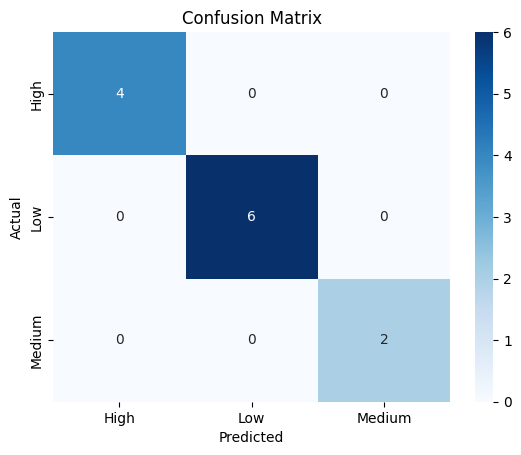

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


📌 Step 9: Predict New Sample

In [12]:
# Example: Predict a new cinnamon sample
new_sample = pd.DataFrame([{
    'Moisture (%)': 10.8,
    'Ash (%)': 6.0,
    'Volatile_Oil (%)': 1.4,
    'Acid_Insoluble_Ash (%)': 0.3,
    'Chromium (mg/kg)': 0.0012,
    'Coumarin (mg/kg)': 0.003
}])

prediction = model.predict(new_sample)
predicted_label = le.inverse_transform(prediction)
print("Predicted Quality:", predicted_label[0])


Predicted Quality: High


In [13]:
df['Quality_Label'].value_counts()


,count
Quality_Label,
High,20
Medium,20
Low,20


In [14]:
import pandas as pd

# Input similar to Medium-quality cinnamon
medium_sample = pd.DataFrame([{
    'Moisture (%)': 12.0,
    'Ash (%)': 6.5,
    'Volatile_Oil (%)': 1.1,
    'Acid_Insoluble_Ash (%)': 0.4,
    'Chromium (mg/kg)': 0.0025,
    'Coumarin (mg/kg)': 0.007
}])

# Predict and show result
medium_pred = model.predict(medium_sample)
print("Predicted Quality (Medium Sample):", le.inverse_transform(medium_pred)[0])


Predicted Quality (Medium Sample): Medium


In [15]:
# Input similar to Low-quality cinnamon
low_sample = pd.DataFrame([{
    'Moisture (%)': 13.2,
    'Ash (%)': 7.3,
    'Volatile_Oil (%)': 0.7,
    'Acid_Insoluble_Ash (%)': 0.7,
    'Chromium (mg/kg)': 0.0035,
    'Coumarin (mg/kg)': 0.016
}])

# Predict and show result
low_pred = model.predict(low_sample)
print("Predicted Quality (Low Sample):", le.inverse_transform(low_pred)[0])


Predicted Quality (Low Sample): Low
